In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
from sklearn import svm


In [90]:
df = pd.read_csv("wine.csv")

In [91]:
df.head(3)

,wine_class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_or_OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_class            178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  OD280_or_OD315        178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [93]:
df.columns = ["Cultivar","Alcohol","Malic","Ash","Alkalinity",
              "Magnesium","Phenols","Flavanoids","Nonflav",
              "Proanthocyan","Color","Hue","OD280","Proline"]

rows, cols = df.shape
print("Dataframe has", rows, "records and", cols, "variables.\n")
df.head()

Dataframe has 178 records and 14 variables.



,Cultivar,Alcohol,Malic,Ash,Alkalinity,Magnesium,Phenols,Flavanoids,Nonflav,Proanthocyan,Color,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [94]:
df.isnull().sum()

Cultivar        0
Alcohol         0
Malic           0
Ash             0
Alkalinity      0
Magnesium       0
Phenols         0
Flavanoids      0
Nonflav         0
Proanthocyan    0
Color           0
Hue             0
OD280           0
Proline         0
dtype: int64

In [95]:
NaN_data_flag = df.isnull().any()
if NaN_data_flag.any():
    print("Some records have NaN values. These will be removed...\n")
    before_rows, before_cols = df.shape
    wine_df = wine_df.dropna()
    after_rows, after_cols = df.shape
    print("Dropped", after_rows - before_rows, "records. Cleaned dataframe has", after_rows, "records.\n")
else:
    print("There are no records with NaN values. Dataframe is already clean.\n")

There are no records with NaN values. Dataframe is already clean.



In [96]:
df.describe().round(3)

,Cultivar,Alcohol,Malic,Ash,Alkalinity,Magnesium,Phenols,Flavanoids,Nonflav,Proanthocyan,Color,Hue,OD280,Proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,1.938,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893
std,0.775,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907
min,1.000,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000
25%,1.000,12.362,1.602,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500
50%,2.000,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500
75%,3.000,13.678,3.082,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000
max,3.000,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,1680.000


<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

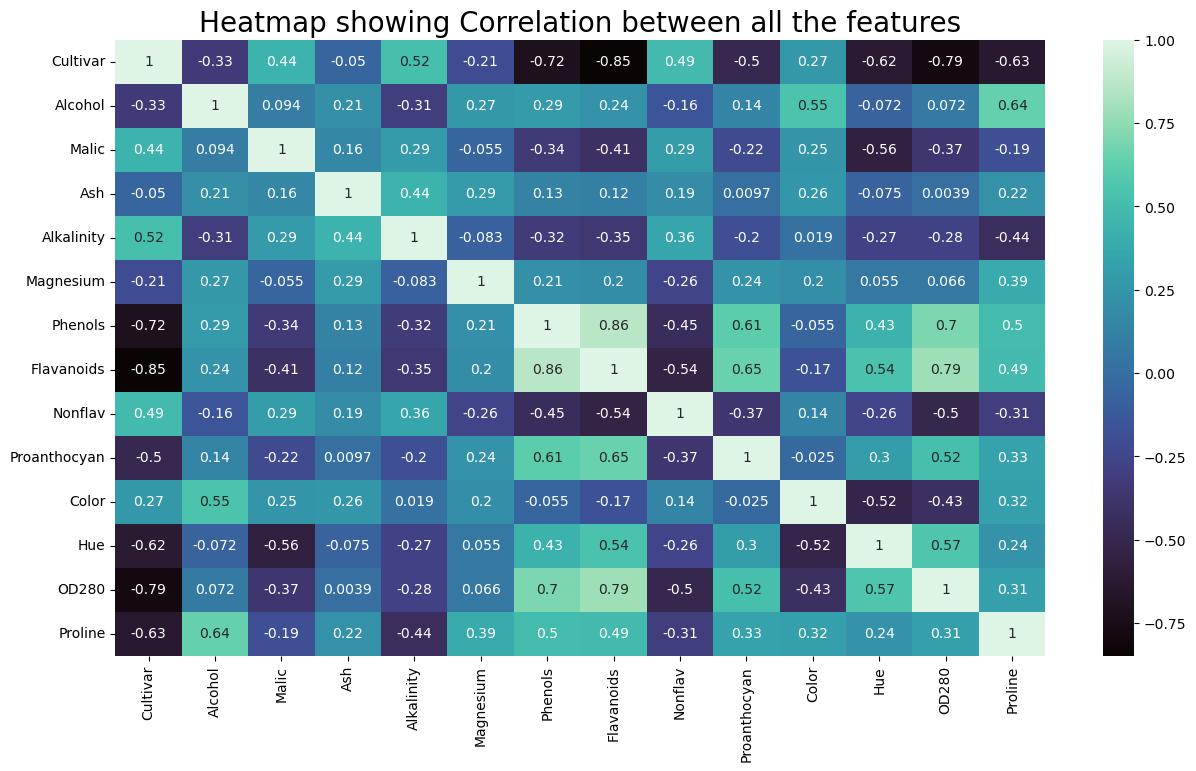

In [97]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True, cmap='mako')

In [98]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
#import plotly.express as px
init_notebook_mode(connected=True) # to show plots in notebook
# online plotly
from plotly.offline import plot, iplot
#plotly.tools.set_credentials_file(username='XXXXXXXXXXXXXX', api_key='XXXXXXXXXXXXXX')

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

colors = plotly.colors.DEFAULT_PLOTLY_COLORS
class_dict = {1: "class 1", 2: "class 2",3:"class 3"}

In [99]:
y=df["Cultivar"].value_counts()
data_bar = [go.Bar(x=[class_dict[x] for x in y.index], 
                y=y.values,
                marker=dict(color=colors[:len(y.index)])
               )]
layout = go.Layout(
    title='Cultivar Class Distribution',
    autosize=False,
    width=400,
    height=400,
    yaxis=dict(
        title='',
    ),
)
total_class = df['Cultivar'].value_counts()
print(total_class,"\n")
print ()
fig = go.Figure(data=data_bar, layout= layout)
#fig.show()
iplot(fig, filename='basic-bar3')


Cultivar
2    71
1    59
3    48
Name: count, dtype: int64 




In [100]:
import plotly.graph_objects as go

data_3=[go.Pie(
    labels=[class_dict[x] for x in y.index],
    values=y.values,
    marker=dict(colors=colors[:len(y.index)])
    
)]

layout_percent = go.Layout(
    title='Percentage class Distribution',
    autosize=False,
    width=400,
    height=400,
)
fig=go.Figure(data=data_3,layout=layout_percent)
fig.show()
#iplot(fig, filename='new')

In [101]:
df.columns = ["Cultivar","Alcohol","Malic","Ash","Alkalinity",
              "Magnesium","Phenols","Flavanoids","Nonflav",
              "Proanthocyan","Color","Hue","OD280","Proline"]

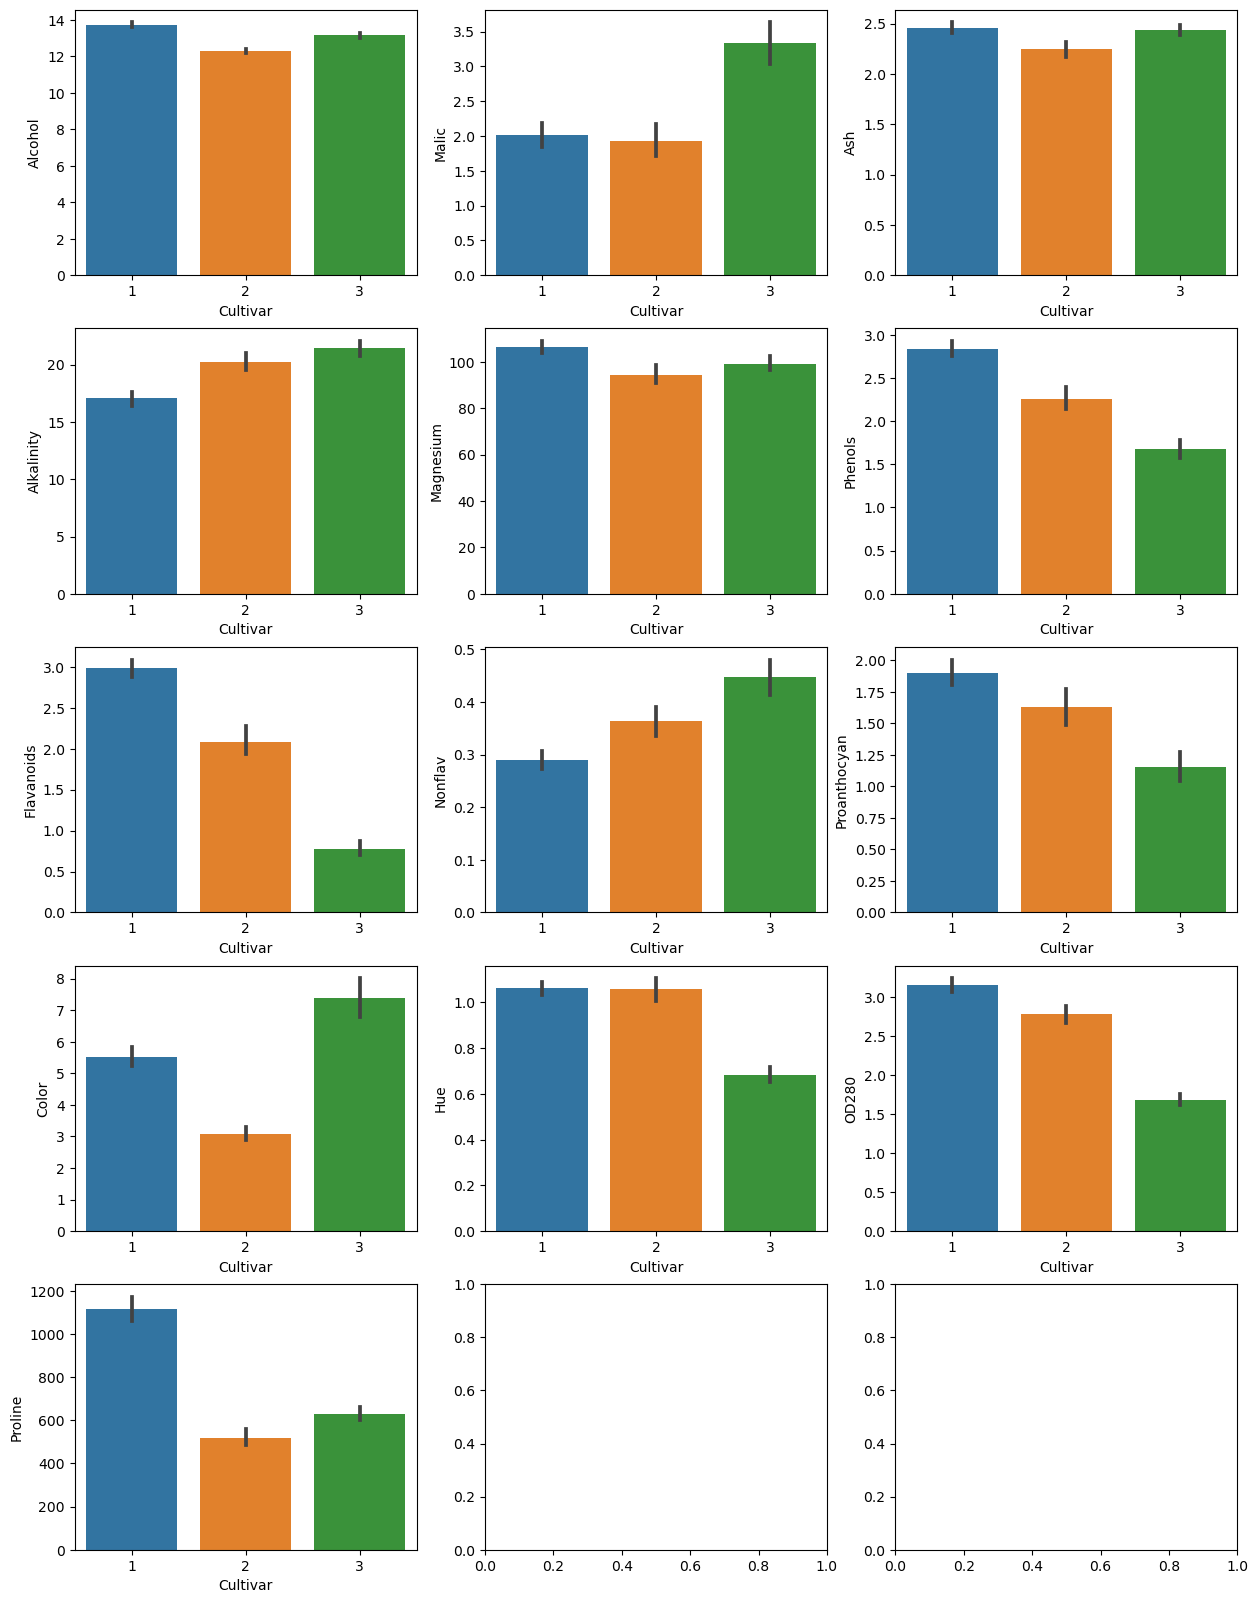

In [102]:
fig, ax = plt.subplots(5,3 , figsize = (15,20)) # Making Subplots

sns.barplot(data = df, y ="Alcohol", x="Cultivar", ax=ax[0,0]);
sns.barplot(data = df, y ="Malic", x="Cultivar", ax=ax[0,1]);
sns.barplot(data = df, y ="Ash", x="Cultivar", ax=ax[0,2]);
sns.barplot(data = df, y ="Alkalinity", x="Cultivar", ax=ax[1,0]);
sns.barplot(data = df, y ="Magnesium", x="Cultivar", ax=ax[1,1]);
sns.barplot(data = df, y ="Phenols", x="Cultivar", ax=ax[1,2]);
sns.barplot(data = df, y ="Flavanoids", x="Cultivar", ax=ax[2,0]);
sns.barplot(data = df, y ="Nonflav", x="Cultivar", ax=ax[2,1]);
sns.barplot(data = df, y ="Proanthocyan", x="Cultivar", ax=ax[2,2]);
sns.barplot(data = df, y ="Color", x="Cultivar", ax=ax[3,0]);
sns.barplot(data = df, y ="Hue", x="Cultivar", ax=ax[3,1]);
sns.barplot(data = df, y ="OD280", x="Cultivar", ax=ax[3,2]);
sns.barplot(data = df, y ="Proline", x="Cultivar", ax=ax[4,0]);

In [161]:
# Splitting datset to X and y axis 

##from sklearn.model_selection import train_test_split


##X = df[['Alcohol']] #prediktor
##y = df[['Cultivar']] # target
###X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [196]:
# Splitting datset to X and y axis 

X=df.iloc[: , 1:14].values
y=df.iloc[: ,0].values

In [197]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [198]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

ANN

In [200]:
# Adding layers and activation function

import tensorflow as tf
ann=tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='tanh'))

#Compiling
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [201]:
# Training the model

ann.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: -14.9271 - accuracy: 0.3169
Epoch 11/

In [208]:
# Prediction on Test data

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

2/2 [==============================] - 0s 24ms/step
[[1 1]
 [1 3]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 3]
 [1 2]
 [1 2]
 [1 3]
 [1 3]
 [1 1]
 [1 2]
 [1 3]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 3]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]]


In [209]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [16  0  0]
 [ 6  0  0]]


0.3888888888888889

SVM

In [210]:
# Training the model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [211]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [212]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [213]:
# Adding layers and activation function
import tensorflow as tf
ann=tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='tanh'))

#Compiling
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [214]:
# Training the model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [215]:
# Predicting the values
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
final_classifier = classifier    # since max quality is for SVM so we have stored this in a final variable

[[1 1]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]]


In [225]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Akurasi Support Vector Machine ",accuracy_score(y_test, y_pred))

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
Akurasi Support Vector Machine  1.0


## Tester Data Final

In [217]:
# In this case maximum quality is for SVM so we will use this algorithm

fin_test_data = pd.read_csv('test.csv')
test_data = fin_test_data.drop('id',axis=1)
test_data = sc.fit_transform(test_data)

In [218]:
final_pred = final_classifier.predict(test_data)
final_pred

array([3, 2, 3, 1, 3, 2, 3, 2, 2, 1, 2, 2, 1, 2, 3, 2, 1, 3, 1, 2, 2, 2,
       2, 1, 3, 3, 1, 2, 3, 1, 1, 3, 1, 1, 2, 1, 2, 2, 1, 3, 3, 1, 3, 3,
       1, 2, 1, 3, 2, 3, 2, 1, 2, 1, 1, 3, 2, 3, 1, 1, 2, 1, 2, 1, 3, 3,
       3, 1, 2, 2, 2, 2, 1, 3, 2, 2, 1, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 2,
       1, 3, 1, 2, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 1,
       1, 1, 1, 1, 2, 3, 3, 2, 2, 3, 1, 1, 2, 3, 1, 3, 2, 2, 2, 1, 2, 2,
       1, 3, 1, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 3, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 3, 2, 3, 1, 2, 3, 3, 2, 2, 2, 3, 3, 2, 1, 2, 2, 1, 2,
       1, 1], dtype=int64)

In [219]:
sample_submit = pd.read_csv('sample_submit.csv')
sample_submit

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
173,173,0
174,174,0
175,175,0
176,176,0


In [221]:
output = pd.DataFrame({'id':fin_test_data.id,'target':final_pred})
output.to_csv('my_submission.csv', index=False)
filename = "my_submission.csv"
print("Your submission was successfully saved!")

Your submission was successfully saved!
